In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

import gif

In [4]:
DOS_TEST = np.loadtxt('DOS_0.dat').view(complex)
E = np.loadtxt('E.dat')
x = np.arange(10)

EE, X = np.meshgrid(E, x)

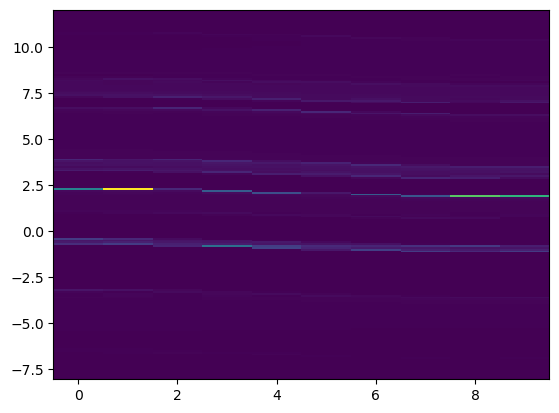

In [5]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [6]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [11]:
@gif.frame
def plot_gold(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((7))
    Efr_dotted = EFR[i+1] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (13,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 250)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i+1] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(8.55-0.50, EFR[i+1] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-4, 10)

In [16]:
frames = [plot_gold(i) for i in range(2)]
gif.save(frames, 'DOS.gif', duration = 3000)

In [13]:
@gif.frame
def plot_idE_gold(i):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    IDE_TEST = np.loadtxt('IDE_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((7))
    Efr_dotted = EFR[i+1] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (16,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, vmin = -2e-3, vmax = 2e-3)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt))
    cbar.ax.set_ylabel('IDE' + ' ' + r'$[\mathbf{A \cdot \left( eV\cdot nm ^2 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i+1]-0.05, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(8.55-0.50, EFR[i+1]-0.05, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-1, 3)

In [15]:
frames_ide = [plot_idE_gold(i) for i in range(2)]
gif.save(frames_ide, 'IDE.gif', duration = 3000)

In [79]:
np.max(DOS_TEST[:, 0])

(115.62428601585327+0j)

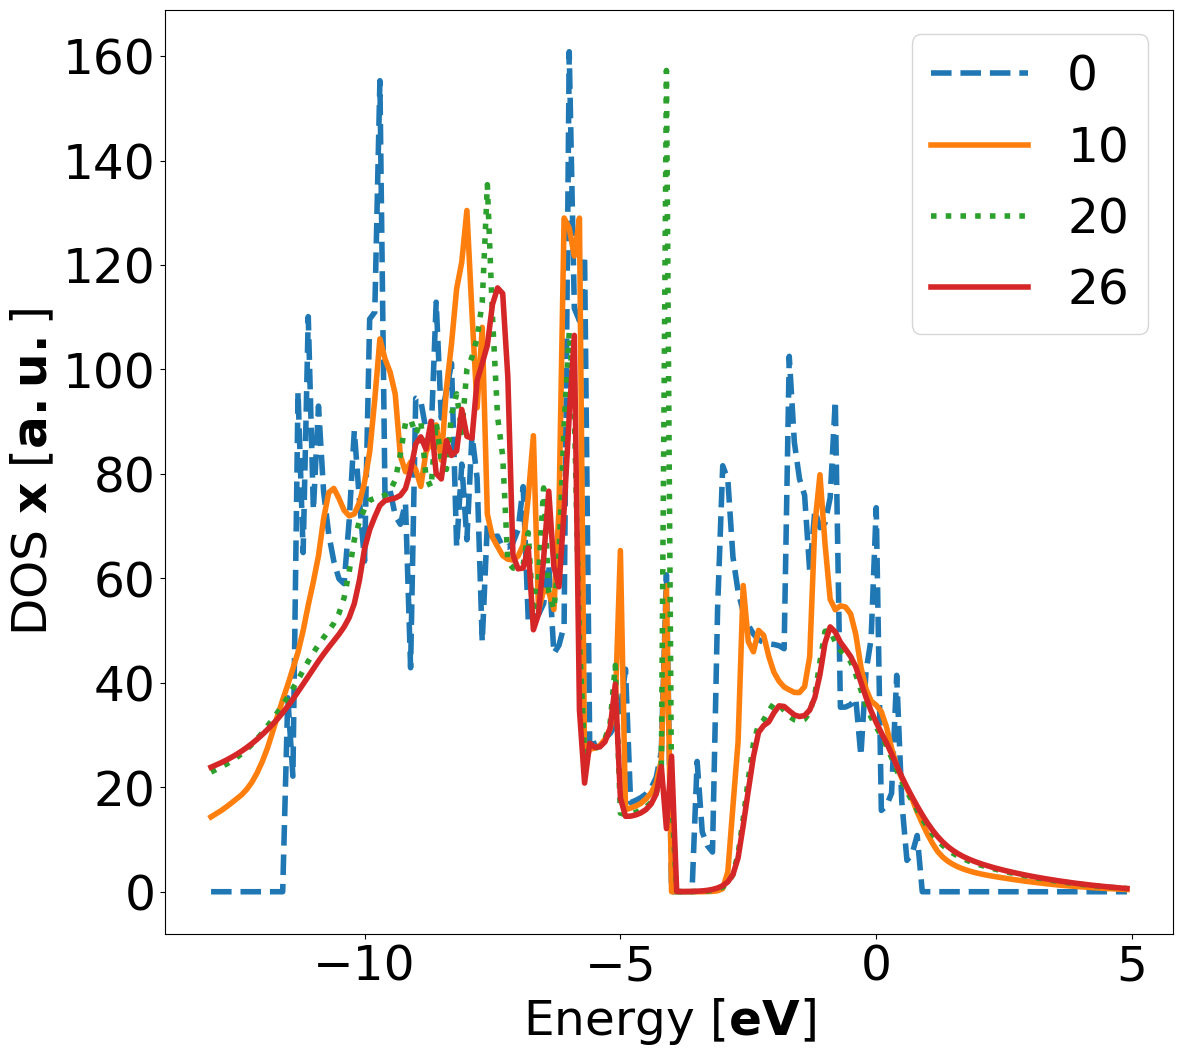

In [80]:
plt.figure(figsize = (13,12))
ax1 = plt.gca()
ax1.set_ylabel('DOS' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{a.u.}]$')
ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')

DOS_TEST = np.loadtxt('DOS_' + str(0) + '.dat').view(complex)

plt.plot(E[45:225], DOS_TEST[45:225, 0], label = '0', linewidth = '4', linestyle = 'dashed')
#DOS_TEST = np.loadtxt('DOS_' + str(1) + '.dat').view(complex)
#plt.plot(DOS_TEST[:, 1])
DOS_TEST = np.loadtxt('DOS_' + str(10) + '.dat').view(complex)
plt.plot(E[45:225], DOS_TEST[49:229, 3], label = '10', linewidth = '4')

DOS_TEST = np.loadtxt('DOS_' + str(20) + '.dat').view(complex)
plt.plot(E[45:225], DOS_TEST[52:232, 5],    label = '20', linewidth = '4', linestyle = 'dotted')

DOS_TEST = np.loadtxt('DOS_' + str(26) + '.dat').view(complex)
plt.plot(E[45:225], DOS_TEST[53:233, 0],   label = '26', linewidth = '4', linestyle = 'solid')

plt.legend()
plt.savefig('dos.png', dpi= 150)